# Plots paper: Ultrastrong capacitive coupling of flux qubits

In [185]:
#Import libraries
import numpy as np
from matplotlib import pyplot as plt
import csv
np.set_printoptions( linewidth=1000 )

In [186]:
# This is to make all fonts latex in matplot lib
from matplotlib import rc
rc('text', usetex=True)
# Define the font size for each part of the plot:
SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=10)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)             # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Subroutines to read data

In [187]:
## Define a function to extract the data from the txt. 
def txt_to_npz_3JJ(EJ, EC, alpha, st, nmax, folder, neig = 7):
    lines = []                             # Declare an empty list to store lines.
    with open ('./'+folder+'/r'+str(EJ/EC)+'EJ'+str(EJ)+'alpha'+str(alpha)+'st'+str(st)+'nmax'+str(nmax)+'.dat', 'rt') as txt: # Open .txt for reading text data.
        for line in txt:                # For each line, stored as line.
            lines.append(line)
    
    #Extract the data from lines.
    gamma=lines[1].split() #remember that the first line are the coments so gamma=second line.
    for i in range(len(gamma)): 
        gamma[i]=complex(gamma[i])
    E=np.zeros((len(gamma),neig),dtype=complex) #Matrix to store the energies values.
    for j in range(neig):
        E_aux= lines[j+2].split() #rows from 2 to 8 give the energies.
        for i in range(len(E_aux)):
            E_aux[i]=complex(E_aux[i])
        E[:,j]=E_aux
        
    P=np.zeros((4,4,len(gamma)),dtype=complex) #Matrix to store the P_ij values.
    P_aux=lines[neig+2].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[0,0]=P_aux
    
    P_aux=lines[neig+3].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[1,1]=P_aux
    
    P_aux=lines[neig+4].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[2,2]=P_aux
    
    P_aux=lines[neig+5].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[3,3]=P_aux
    
    P_aux=lines[neig+6].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[0,1]=P_aux
    
    P_aux=lines[neig+7].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[1,0]=P_aux
    
    P_aux=lines[neig+8].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[0,2]=P_aux
    
    P_aux=lines[neig+9].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[2,0]=P_aux
    
    P_aux=lines[neig+10].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[0,3]=P_aux
    
    P_aux=lines[neig+11].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[3,0]=P_aux
    
    P_aux=lines[neig+12].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[1,2]=P_aux
    
    P_aux=lines[neig+13].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[2,1]=P_aux
    
    P_aux=lines[neig+14].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[1,3]=P_aux
    
    P_aux=lines[neig+15].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[3,1]=P_aux
    
    P_aux=lines[neig+16].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[2,3]=P_aux
    
    P_aux=lines[neig+17].split()
    for i in range(len(P_aux)): 
        P_aux[i]=complex(P_aux[i])
    P[3,2]=P_aux
    
    return gamma, E, P

Fig 1 is in a .svg file

# Fig 3 

In [188]:
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height])
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= 1#rect[2]**0.5
    y_labelsize *= 1#rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

Plot a $g/\Delta$ and the anharmonicity for one qubit parameters:

In [189]:
# This is to make all fonts latex in matplot lib
from matplotlib import rc
rc('text', usetex=True)
# Define the font size for each part of the plot:
SMALL_SIZE = 13
MEDIUM_SIZE = 18
BIGGER_SIZE = 25
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)             # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/home/pino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


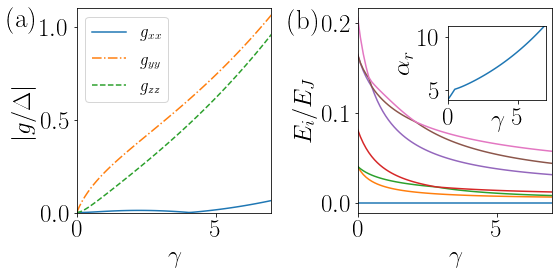

In [190]:
#Parameters.stem of two coupled qubits and the results of the full SWT for the coupling. 
#Charge results.
alpha = 0.65
r = 50
EJ = 1
EC = 1/r
st = 2
nmax = 10
γ, E, P = txt_to_npz_3JJ(EJ, EC, alpha, st, nmax,'data_Maria')

# print(γ)
E=np.real_if_close(E,10)
P=np.real_if_close(np.round(P,10),10)
γ=np.real_if_close(γ)


# # Plot the results for the qubit Hamiltonian showing the strength of the coupling.
fig,(ax1,ax2) =plt.subplots(ncols=2, nrows=1,figsize=(8, 4))


symbols = ["-","-","-.","--"]
# ax1.text(-2.7,4.5,'$\\textrm{(a)}$',fontsize=27)
labels = [['$g_{00}$', '$g_{0x}$','$g_{0y}=-\epsilon_1/2$','$g_{0z}=-\Delta_1/2$'],['$J_{x0}$', '$g_{xx}$','$g_{xy}$','$g_{xz}$'],['$g_{y0}=-\epsilon_2/2$', '$g_{yx}$','$g_{yy}$','$g_{yz}$'], ['$g_{z0}=-\Delta_2/2$', '$g_{zx}$','$g_{zy}$','$g_{zz}$']] # useful to print the legend.
ax1.text(-2.5,1,'$\\textrm{(a)}$',fontsize=27)
for k in range(1,4):
    if np.any(P[k,k,:]!=0):
        label=labels[k][k]
        ax1.plot(γ,np.abs(P[k,k,:]/(P[0,3,:]*2)),symbols[k],label = label)
ax1.set_xlim([0,7])
ax1.set_ylim([0,1.1])
ax1.legend( fontsize=17)
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$|g/\Delta|$')

#Plot the result for the energy of then system ad the comparision between the level splitting and the strength of the coupling.
ax2.text(-2.5,0.194,'$\\textrm{(b)}$',fontsize=27)
ax2.plot(γ, E-E[:,[0]*7], label='')
# ax2.legend(('$E_0$', '$E_1$','$E_2$','$E_3$','$E_4$','$E_5$', '$E_6$'))
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$E/E_J$')
# ax2.legend(title="$E_j/E_c$="+str(EJ/EC)+", $\\alpha$ ="+str(alpha), fontsize=15)
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$E_i/E_J$')
ax2.set_xlim([0,7.])

# left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
# ax3 = ax2.add_axes([left, bottom, width, height])


subpos = [0.7,0.67,0.485,0.34]
subax2 = add_subplot_axes(ax2,subpos)

subax2.plot(γ, (E[:,4]-E[:,0])/(-P[0,3,:]*2))
subax2.set_ylabel("$\\alpha_r$", fontsize=25)
subax2.set_xlabel("$\\gamma$", fontsize=25,labelpad=-20)
subax2.set_xlim([0,7])
subax2.set_ylim([4,11.])
# plt.yscale('log')

plt.tight_layout()
plt.savefig('Fig3.pdf')



# Figure 4

We compute now 1st and 2nd order correction. The first order corrections for the coupling Hamiltonian of two 3 JJs flux qubit are:

\begin{align}
H^{(1)} =&g^{(1)} \sigma_1^y\sigma_2^y\\
\frac{g^{(1)}}{\Delta} = & \frac{\gamma(1+2\alpha+2\beta)}{(1+2\alpha+2\beta+2\gamma)} \frac{\Delta \varphi_\star^2}{2E_C} 
\end{align}

where the gap without any renormalization is $\Delta$ and $E_c$ is the charging energy of the large qubit junction. The coupling capacitance is $\gamma C.$ Notice that there are also first order term that renormalize the qubit gap.

It is important to use the correct form for the qubit capacitance: $C_q = C(1+2\alpha+2\beta+2\gamma).$ In the paper of Orlando1999, it appears with an extra factor 2. This factor is due to the fact that they do not use normal modes for the flux variable of the qubit. We are using normal mode $\phi_q = (\phi_a-\phi_b)/\sqrt{2},$ with fluxes $\phi_a,\phi_b$ given by the convention in Orlando 1999.

In [191]:
def give_x_1st(gamma, E_g, beta=0, alpha=0, Ej=0, Ec=0):
    gz = gamma * (4*(1+2*alpha+2*beta)**2+4*gamma*(1+2*alpha+2*beta)) /(2*(1+2*alpha+2*beta)+gamma)**2
    phi_s = np.arccos(1/(2*alpha))
    x = gz * E_g/(2*Ec) * (phi_s**2)
    return x
def give_x_2nd(gamma, E_g, E_e, E_ge, beta=0, alpha=0, Ej=0, Ec=0):
    x = (gamma**2/8) * ((E_e-E_g)/(1+2*alpha+2*beta))**2/ (E_ge*E_g)
    return x

In [192]:
# Results:

In [193]:
# This is to make all fonts latex in matplot lib
from matplotlib import rc
rc('text', usetex=True)
# Define the font size for each part of the plot:
SMALL_SIZE = 13
MEDIUM_SIZE = 18
BIGGER_SIZE = 25
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)             # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In order to produce Figure 4, use the Figures.svg in the same folder than this file. Get the Fig.3 produced by the following code and put it in the Figures.svg

IndexError: list index out of range

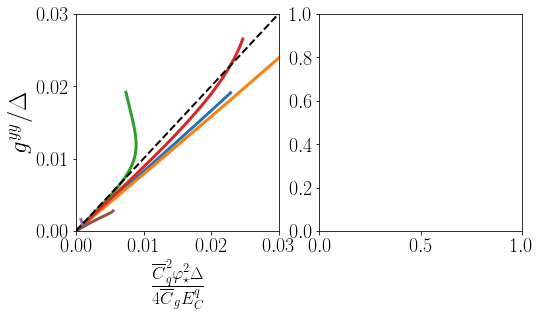

In [195]:
import itertools
from scipy.signal import argrelextrema
st = 2
nmax = 7
alpha_pinta = [0.7,0.8,0.9]
r_pinta = [80,50]
EJ = 1
lin = [] 
lin_lab = []
fig,(ax1,ax2) =plt.subplots(ncols=2, nrows=1,figsize=(8, 4))
for (alpha, r) in itertools.product(alpha_pinta, r_pinta):
    EC = 1/r
    γ, E, P = txt_to_npz_3JJ(EJ, EC, alpha, st, nmax, 'acoplos_SWT')
    E=np.real_if_close(E,10)
    P=np.real_if_close(np.round(P,13),10)
    γ=np.real_if_close(γ)
    xpinta = give_x_1st(γ[:],np.abs(P[0,3,:])*2, alpha = alpha, Ej = EJ, Ec = EC)
    ypinta = np.abs(P[2,2,:]/(P[0,3,:]*2))
    ipinta = -1#np.where(xpinta == np.amax(xpinta))[0][0]
    lin.append(ax1.plot(xpinta[0:], ypinta[0:],"-",linewidth=3.0)[0])
    lin_lab.append("$\\frac{E_j}{E_c}=$"+str(r)+"$, \\alpha=$"+str(alpha))
ax1.set_xlim([0,0.03])
ax1.set_ylim([0,0.03])
xy = np.linspace(0,1.3,100)
ax1.plot(xy,xy,"--",linewidth=2.0, color="black" )
ax1.set_xlabel('$\\frac{\overline{C}_q^2 \\varphi_\\star^2 \\Delta}{4\overline{C}_g E_C^{q}} $')
ax1.set_ylabel('$g^{yy}/\Delta$')

# -------------------------------------------------------------------------
# Second figure
st = 2
nmax = 7
alpha_pinta = [0.7,0.8,0.9]
r_pinta = [50,80]
EJ = 1
for (alpha, r) in itertools.product(alpha_pinta, r_pinta):
    EC = 1/r
    γ, E, P = txt_to_npz_3JJ(EJ, EC, alpha, st, nmax, './acoplos_SWT', neig = 12)
    E_e = E[0,8]-E[0,4]
    E_ge = E[0,4]-E[0,0]
    E=np.real_if_close(E,10)
    P=np.real_if_close(np.round(P,13),10)
    γ=np.real_if_close(γ)
    xpinta = give_x_2nd(γ[:],np.abs(P[0,3,:])*2, E_e, E_ge, alpha = alpha, Ej = EJ, Ec = EC)
    ypinta = np.abs(P[3,3,:])/(-P[0,3,:]*2)
    ipinta = np.where(ypinta == np.amax(ypinta))[0][0]
    ax2.plot(xpinta, ypinta[0:],"-",linewidth=3.0,label="$E_j/E_c=$"+str(r)+"$, \\alpha=$"+str(alpha))

ax2.set_xlim([0,0.0011])
ax2.set_ylim([0,0.0011])
xy = np.linspace(0,1.3,100)
ax2.plot(xy,xy,"--",label="y=x",linewidth=2.0, color="black" )
ax2.set_xlabel('$\\left(\\frac{\overline{C}_q}{\overline{C}_g}\\right)^2 \\frac{\\left(\\Delta_e-\\Delta\\right)^2}{\hbar\omega_q \Delta}$')
ax2.set_ylabel('$g^{zz}/\\Delta$')
ax2.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.xaxis.get_offset_text().set_visible(False)
ax2.text(0.0011, -0.00012, "$\\times 10^{-3}$", fontsize=20)
# ax1.legend(fontsize=9, bbox_to_anchor=(0.5, 1), loc='upper left')

fig.legend(lin,     # The line objects
           labels=lin_lab,   # The labels for each line
           bbox_to_anchor=(1.07, 0.62),
           loc="center right",   # Position of legend
           borderaxespad=+0,    # Small spacing around legend box
#            title="Legend Title"  # Title for the legend
           )

# ----------------------------- inset---------------------------
# alpha = [0.6,0.65,0.7,0.75,0.8,0.85,.9,0.95]
# r1 = 80
# xq1, gap1 = charge_n(alpha, r1)  
# r2 = 50
# xq2, gap2 = charge_n(alpha, r2)  
# xqt1 = [q_t(alpha[i], gap1[i], Ec = 1/r1) for i in range(len(alpha))]
# subpos = [0.22,0.71,0.5,0.3]
# subax1 = add_subplot_axes(ax1,subpos)
# subax1.plot(alpha, xq1, "o-", label = "Numeric $E_J/E_C=$"+str(r1))
# subax1.plot(alpha, xqt1, ".-.", label="Theory $E_J/E_C=$"+str(r1))
plt.tight_layout()
plt.savefig('Fig4_data.pdf', bbox_inches='tight')

# Fig 2
Scaling of qubit-resonator. We plot several cases of qubit-resonator coupling.

In [ ]:
import CircuitClass_SWTPauliBasis as CClass #Import the circuit class defined in CircuitQED to create circuits.
# To extract coupling, we trace out the qubit degrees of freedom to obtain a bosonic hamiltonian Hb. 
# This is done by multiplying the efefctive low-energy Hamiltonian in Heff by sigma_y and tracing over qubit. 
# If print true, it will print the full bosonic 
# Hamiltonian so one can check that it has the form of a bosonic oscillator. 
# Inputs: Heff effective Hamiltonian. nco is cutoff in the number of bosonic states. rd the accuracy to obtain results
# Outputs: the coupling.The coupling constant is obtained as the element Hb[0,1].
def coupling_constant(Heff, nco, rd, pinta = False):
    #Qubit basis = Pauli Basis (needed term)
    σy = np.array([[0, -1j], [1j, 0]])
#     σx = np.array([[0, 1], [1, 0]])#
#     σz = np.array([[1, 0], [0, -1]])
    ide = np.identity(nco)
    Hr = (np.kron(σy,ide) @ Heff).reshape((2, nco, 2, nco))
    Hb = np.trace(Hr,axis1=0, axis2=2)/2
    #Junction basis (needed term).
    P = Hb[0,1]
    if pinta:
        np.set_printoptions(suppress=True)
        print("Hb/Hb[1,0]=",np.abs(P),"*")
        print(np.round(Hb/P,3))
    return np.abs(P)
import scipy.sparse as sp
from CircuitClass_SWTPauliBasis import diagonalize

class FluxCavity:
    def __init__(self, γ, alpha, ECq, EJq, ECr, EJr, beta=0, flux1=0, pert1=0, pert2=0, nmax=12, nLC=3):
        # s is ratio between Cjunction and Cqubit. The S is ratio between EJjunction and Ejqubit
        ### s gives Cs/C and S gives EJs/EJ.  
        # This ensures alpha has at least two elements
        circ=C=CClass.Circuit(5, nmax=nmax)
        # Add capacitances and junctions for qubit. 
        circ.add_capacitance(1.0, 0, 1)
        circ.add_capacitance(1.0, 0, 2)
        circ.add_capacitance(alpha+beta, 1, 2) 
        circ.add_junction(1, 1, +1, 0, -1)
        circ.add_junction(1, 2, -1, 0, +1)
        circ.add_junction(alpha*(1+pert1), 2, -1, 1, +1,-flux1)
        # Add capacitances and junctions for junction.
        circ.add_capacitance(ECq/ECr, 3, 4)
        circ.add_junction(EJr/EJq, 4, -1, 3, 1)
        #Coupling.
        if γ:
            circ.add_capacitance(γ, 2, 3)
        #Ground.
        # Once we remove the ground, we have 3 nodes
        # [0,1] for the qubit, [2] for the cavity
        circ = circ.set_ground([1,4])
        self.EJ = EJq
        self.EC = ECq
        self.ωr = np.sqrt(8 * ECr * EJr)
        
        a = sp.diags(np.sqrt(np.arange(1, nLC+1)), 1)
        n0 = np.sqrt(np.sqrt(EJr/(8*ECr)))
#         There is a factor sqrt(1/2) that was missing in original Juanjo's code:
        self.LC_n = n0*(a + a.T)/np.sqrt(2)
        self.LC_E = self.ωr * np.arange(0, nLC+1)
        self.LC_basis = np.eye(nLC+1)
        self.LC_Hamiltonian = sp.diags(self.LC_E)
        self.qubit_Hamiltonian = circ.single_Hamiltonian(nodes=[0,1], EC=self.EC, EJ=self.EJ)
        self.qubit_n = circ._op_kron(2, circ.id, 0, circ.n, 1)
        iq = sp.eye((2*nmax+1)**2)
        ir = sp.eye(nLC+1)
        self.Cinv = np.linalg.inv(circ.C)
        Hint = 4 * self.EC * self.Cinv[1,2] * sp.kron(self.qubit_n, self.LC_n)
        self.Hamiltonian = Hint + Hint.T + sp.kron(self.qubit_Hamiltonian, ir) \
                         + sp.kron(iq, self.LC_Hamiltonian)
def SW_effective_Hamiltonian(ψb0, E, ψb, EC=1.0, EJ=1.0):
    """Given a circuit obtains its effective Hamiltonian in the lower subspace (qubit) using S-W tranformation.

    Input: 
    self=circuit 
    E= full system eigenvectors
    ψb= full system eigenstates
    ψb0= qubit basis 
    EC= capacitive energy (default=1.0)
    EJ= Josephson energy (default=1.0)
    which= vector containing the position of the nodes to take into account (useful when we want to obtain the Hamiltonian of a single element) (default=None-> full Hamiltonian)

    Output:
    Hq= Hamiltonian in the qubit basis."""

    Q = ψb0.T.conj()@ψb
    U, s, Vh= np.linalg.svd(Q)
    A=U@Vh
    Hq=A@np.diag(E)@A.T.conj()

    return Hq
# Subroutine to solve and project a circuit with a Josephson junction and a resonator coupled via a capacitor. The
# energies labeled with r correspond to resonator and the ones with q to qubits. The nco is the cutoff in the
# bosonic modes. alpha is ratio of junctions in the qubit and gamma strength of the coupling in units of C. For
# full Schreiffel wolf set method = "SW" and for only projection onto the low energy set "QB".
def qubit_res(alpha, EJq, ECq, EJr, ECr, γ, beta = 0, nco =10, pinta = False, method = "SW", fs = "False"):
    ## Result for Φ1=Φ2=0.5Φ0.
    #Set parameters.
    flux1=0.5*2*np.pi
    EJ= EJq
    EC= ECq
    if type(γ) is not list:
        γ =[γ]
#     γ=np.arange(0,0.01,0.01)
    nmax=12
    nLC=nco-1
    rd=10
    e=1e-4

    #Matrix to store the values of the constants.  
    E=np.zeros((len(γ),2*nco))
    Eq=np.zeros((len(γ),2*nco))
    P=np.zeros((len(γ)),dtype=complex)
    Ener_r = np.zeros((len(γ),nLC+1))
    Ener_q = np.zeros((len(γ),2))
    Ener_q_full = np.zeros((len(γ),4))

    #Hamiltonians to construct flux operators.
    Hf_plus = FluxCavity(0, alpha, ECq, EJq, ECr, EJr, beta=beta, flux1=flux1+e*2*np.pi, nmax=nmax, nLC=nLC)
    Hf_plus = Hf_plus.qubit_Hamiltonian
    Hf_minus = FluxCavity(0, alpha, ECq, EJq, ECr, EJr, beta=beta, flux1=flux1-e*2*np.pi, nmax=nmax, nLC=nLC)
    Hf_minus = Hf_minus.qubit_Hamiltonian

    # The derivative of the energy w.r.t. the flux is flux operator because it acts on the +/- superposition states of currents
    F = (Hf_plus - Hf_minus)/(2*e*2*np.pi)


    for j,g in enumerate(γ):
        #Circuit.
        C = FluxCavity(g, alpha, ECq, EJq, ECr, EJr, beta=beta, flux1=flux1, nmax=nmax, nLC=nLC)

        #Renormalized qubit basis.
        Ener_q_full[j,:], ψ0_1 = diagonalize(C.qubit_Hamiltonian, full=False, neig=4)
        ψ0_1 = ψ0_1[:,:2]
        Phase=ψ0_1[:,0].T.conj() @ F @ ψ0_1[:,1]/np.abs(ψ0_1[:,0].T.conj() @ F @ ψ0_1[:,1])
        ψ0_new_1=ψ0_1
        ψ0_new_1[:,1]=ψ0_1[:,1]/Phase
    
        #Renormalized junction basis.
        Ener_r[j,:], ψ0_2 = C.LC_E, C.LC_basis
        #     Composed basis.
        ψb0=np.kron(ψ0_new_1, ψ0_2)

        #System energies and eigenstates.
        E[j,:], ψ = diagonalize(C.Hamiltonian, full=False, neig=2*nco)
        
        #Effective Hamiltonianian.
        if method == "SW":
            Hq = SW_effective_Hamiltonian(ψb0, E[j,:], ψ, EC=EC, EJ=EJ)
        else:
            raise Exception()
        Eq[j,:],_ = np.linalg.eigh(Hq)
        P[j]=coupling_constant(Hq, nco, 10, pinta=pinta)
    return Ener_r, Ener_q_full, E, Eq, P

def gqr_gap(gamma1, EJq, ECq, EJr, ECr, alpha, beta=0):
    if type(gamma1) == list:
        gamma = np.array(gamma1)
    else:
        gamma = gamma1
    phi_s = np.arccos(1/(2*alpha))
    x1 = (1+2*alpha+2*beta)
    ratio1 = ECq/ECr
    ECr_re = ECr * ratio1* (gamma+1+2*alpha+2*beta)/ ( ratio1*gamma+ (ratio1+gamma)*(1+2*alpha+2*beta)   )
    xaux1 = (1+2*alpha+2*beta)+ gamma*ratio1/(gamma+ratio1)
    xaux2 =  (1+2*alpha+2*beta) * (ratio1+ (1+ratio1/(1+2*alpha+2*beta))* gamma ) 
    cr = gamma* xaux1/xaux2
    g = ( phi_s*np.sqrt(np.pi) ) * cr *(EJr/(ECr_re*32))**0.25
    return g

In [ ]:
# This is to make all fonts latex in matplot lib
from matplotlib import rc
rc('text', usetex=True)
# Define the font size for each part of the plot:
SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)             # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
import os
import re

pat = ["alpha(.*?)E", "EJq(.*?)rq", "rq(.*?)EJr","EJr(.*?)rr", "rr(.*?)nco", "nco(.*?)method", "method(.*?).dat" ]
fdata_p = []
para_p = []
# print(os.listdir("./"))
for f in os.listdir("./data_LC_qubit/"):
    if f.startswith("alpha") and f.endswith(".dat"):
#         print(re.search("alpha(.*?)E", f).group(1))
        fdata_p.append(f)
        para_p.append([ re.search(a, f).group(1) for a in pat])

In [ ]:
coup = []
for j, f in enumerate(fdata_p):
    data = np.genfromtxt("./data_LC_qubit/"+f)
    alpha = float(para_p[j][0])
#     print(j,alpha)
    EJq = float(para_p[j][1])
    ECq = EJq/float(para_p[j][2])
    EJr = float(para_p[j][3])
    ECr = EJr/float(para_p[j][4])    
#     if float(alpha) == 0.65:/
    γ = data[:,0]
    gc = data[:,1]
    delta_q = data[:,2]
    delta_r = data[:,3]
    coup.append( -gc[-1]/delta_r[-1])

indx = np.argsort(coup)
para = [para_p[indx[i]]  for i in range(len(para_p))]
fdata = [fdata_p[indx[i]]  for i in range(len(para_p))]


In [ ]:
import matplotlib.pylab as pl
# color = []
n = len(para)
color = pl.cm.jet(np.linspace(0,1,n))
f_single = "alpha0.65EJq1rq20EJr0.025rr5nco30method_SW.dat"
para_single = [ re.search(a, f_single).group(1) for a in pat]

In [ ]:

from pylab import *
# fig, (ax1, ax2)=plt.subplots(ncols=2, nrows=1, figsize=(11, 7))
plt.figure(figsize=(12.2, 9))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,4)
# ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3]

lin = [] 
lin_lab = []
legend1 = []
legend2 = []
label1 = []
label2 = []
nsplit = int(len(fdata) /2)
colors = []
for j, f in enumerate(fdata):
    data = np.genfromtxt("./data_LC_qubit/"+f)
    alpha = float(para[j][0])
    EJq = float(para[j][1])
    ECq = EJq/float(para[j][2])
    EJr = float(para[j][3])
    ECr = EJr/float(para[j][4])   
    nco = float(para[j][5])
#     if nco == 30:
    γ = data[:,0]
    gc = data[:,1]
    delta_q = data[:,2]
    delta_r = data[:,3]
    x = gqr_gap(γ, EJq, ECq, EJr, ECr, alpha, beta=0)
    if j < nsplit:
        label1.append("$\\alpha=$"+str(para[j][0])+", $r_q=$"
             +para[j][2]+", $r_{qs}$="+str(int(1/EJr)) + "$, r_s$= "+para[j][4])
        p1,  = ax1.plot(x[:],gc[:]/delta_q[:], color =color[j], label = label1[j] ,zorder=j, linewidth=5)
        legend1.append(p1)
    else: 
        label2.append("$\\alpha=$"+str(para[j][0])+", $r_q=$"
             +para[j][2]+", $r_{qs}$="+str(int(1/EJr)) + "$, r_r$= "+para[j][4])        
        p2,  = ax1.plot(x[:],gc[:]/delta_q[:], color =color[j], label = label2[j-nsplit],zorder=j,linewidth=5)
        legend2.append(p2)
    ax2.plot(γ,gc/delta_r, label = "$\\alpha =$"+str(para[j][0])+", $r_q=$"
             +para[j][2]+", $E_J^r/E_J^q$="+str(round(EJr,2)) + "$, r_r$= "+para[j][4], color =color[j],  linewidth=4)
ax1.text(-0.2, 0.97, "$\\textrm{(a)}$",verticalalignment='center', transform=ax1.transAxes, fontsize = 40)    
ax2.text(-0.29, 0.92, "$\\textrm{(b)}$",verticalalignment='center', transform=ax2.transAxes, fontsize = 40)    
xx = np.linspace(0,2,100)
ax1.plot(xx,xx,"--", color = "black", linewidth=1)
ax1.set_xlabel('$\\frac{\overline{C}_q}{\\overline{C}_g}\\frac{\\varphi^\star}{2}\sqrt{\\frac{1}{2\pi G_0\mathcal{Z}}} $')
ax1.set_ylabel('$g/\\Delta_q$') 
ax2.set_xlabel('$\gamma$')
ax2.set_ylabel('$g/(\\hbar\\omega_r)$') 
ax1.set_xlim([0, 0.7])
ax1.set_ylim([-0.22, 0.9])
ax2.set_ylim([0, 0.2])
ax2.set_xlim([0, 3])
# ###################################################################
# # Inset:
# ###################################################################
# f_s = "alpha0.65EJq1rq30EJr0.033333rr20nco30method_SW.dat"
js = fdata.index(f_single)
# para_single = [ re.search(a, f_single).group(1) for a in pat]

data = np.genfromtxt("./data_LC_qubit/"+f_single)
alpha = float(para[js][0])
EJq = float(para[js][1])
ECq = EJq/float(para[js][2])
EJr = float(para[js][3])
ECr = EJr/float(para[js][4])   
nco = float(para[js][5])
#     if nco == 30:
γ = data[:,0]
gc = data[:,1]
delta_q = data[:,2]
delta_r = data[:,3]
# left, bottom, width, height = [0.16, 0.68, 0.25, 0.22]
# ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(γ,gc/delta_q,label = "$g/\\Delta$", color ="black", linewidth=4)
ax3.plot(γ,gc/delta_r, "--",label = "$g/(\\hbar \\omega_r)$", color = "black", linewidth=4)
ax3.text(-0.28, 1, "\\textrm{(c)}",verticalalignment='center', transform=ax3.transAxes, fontsize = 40)
ax3.text(0.4, 0.84, "$\\newline \\alpha =$"+str(para_single[0])+", $r_q=$"
             +para_single[2]+"$\\newline \\newline  r_{qs}$="+str(int(1/EJr)) + "$, r_r=$"+para_single[4], 
              fontsize=22, horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)
ax3.legend(fontsize = 18, loc =4)
# ax3.legend(fontsize = 18, loc =1, title = "$\\alpha =$"+str(para_single[0])+", $r_q=$"
#              +para_single[2]+", $E_J^r/E_J^q$="+str(round(EJr,2)) + "$, r_s=$"+para_single[4])
ax3.set_xlim([0, 3])
ax3.set_ylim([0, 0.22])
ax3.set_xlabel('$\gamma$')
# ###################################################################
###################################################################

plt.tight_layout()
l1 = ax1.legend(legend1[::-1], label1[::-1], loc=4, fontsize=19.2)
l2 = ax1.legend(legend2[::-1], label2[::-1], loc=2, fontsize=19.2)
# ax1.gca().add_artist(l1)
ax1.add_artist(l1)
# ax1.add_artist(legend1, label1, loc=2)
# ax1.add_artist(legend2, label2, loc=2)
# gca().add_artist(l1)
# ax1.legend(fontsize =12)

plt.savefig("Fig2.pdf", bbox_inches='tight')